In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/colcolon/coloncolonoscopy.csv
/kaggle/input/colon-iee/colon_ieee.csv
/kaggle/input/colon-sp/colon_springer.csv
/kaggle/input/colon-sp1/colonfilter1.csv
/kaggle/input/colon-2000/colon2000.csv
/kaggle/input/col-spring/colon_ai_springer.csv


In [2]:
!pip install litstudy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.0 MB/s eta 0:00:00
  Created wheel for litstudy: filename=litstudy-1.0.5-py3-none-any.whl size=48073 sha256=03907ad0923cad8dfcce0960b01574ebef838fdc57734c2738700324e0b843d3
  Stored in directory: /root/.cache/pip/wheels/44/17/0a/4879fe1ccd84a639dbf7ffe908724cb5a75ed1221b4b180c9b
  Created wheel for bibtexparser: filenam

In [3]:
!pip install -q "tensorflow-text==2.8.*"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.8.4 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<2.10,>=1.15.5, but you have tensorflow 2.8.4 which is incompatible.
tensorflow-serving-api 2.9.0 requires tensorflow<3,>=2.9.0, but you have tensorflow 2.8.4 which is incompatible.
tensorflow-io 0.21.0 requires tensorflow<2.7.0,>=2.6.0, but you have tensorflow 2.8.4 which is incompatible.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesyst

In [4]:
import tensorflow as tf
import tensorflow_text as text

In [5]:
# Import other libraries 
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy

In [6]:
# Load the CSV files
docs1 = litstudy.load_ieee_csv('/kaggle/input/colon-iee/colon_ieee.csv')
docs2 = litstudy.load_ieee_csv('/kaggle/input/colcolon/coloncolonoscopy.csv')
docs3 = litstudy.load_ieee_csv('/kaggle/input/colon-2000/colon2000.csv')
docs_ieee = docs1 | docs2 | docs3 
print(len(docs_ieee), 'papers loaded from IEEE')
doc1 = litstudy.load_springer_csv('/kaggle/input/colon-sp/colon_springer.csv')
doc2 = litstudy.load_springer_csv('/kaggle/input/colon-sp1/colonfilter1.csv')
doc3 = litstudy.load_springer_csv('/kaggle/input/col-spring/colon_ai_springer.csv')
docs_springer = doc1 | doc2 | doc3 
docs_csv = docs_ieee | docs_springer

print(len(docs_csv), 'papers loaded from CSV')

print(len(docs_springer), 'papers loaded from Springer')

#docs_springer = litstudy.load_springer_csv('data/springer.csv')
#print(len(docs_springer), 'papers loaded from Springer')

# Merge the two document sets
#docs_csv = docs_ieee | docs_springer
#print(len(docs_csv), 'papers loaded from CSV')

3865 papers loaded from IEEE
5872 papers loaded from CSV
2007 papers loaded from Springer


In [7]:
#457d6b58a3fa7a7b46ef3e2246236c24
#2cbfc339871dc73c1e5f5ef1b591e706

In [8]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

docs_scopus, docs_notfound = litstudy.refine_scopus(docs_csv)

print(len(docs_scopus), 'papers found on Scopus')
print(len(docs_notfound), 'papers were not found and were discarded')

Creating config file at /root/.config/pybliometrics.cfg with default paths...


Please enter your API Key(s), obtained from http://dev.elsevier.com/myapikey.html.  Separate multiple keys by comma:
 457d6b58a3fa7a7b46ef3e2246236c24
API Keys are sufficient for most users.  If you have an InstToken, please enter the token now; otherwise just press Enter:
 2cbfc339871dc73c1e5f5ef1b591e706


Configuration file successfully created at /root/.config/pybliometrics.cfg
For details see https://pybliometrics.rtfd.io/en/stable/configuration.html.


  0%|          | 13/5872 [00:08<47:34,  2.05it/s] /opt/conda/lib/python3.7/site-packages/litstudy/sources/scopus.py:230: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(f"no document found for DOI {doi}: {e}")
100%|██████████| 5872/5872 [43:55<00:00,  2.23it/s]  

5180 papers found on Scopus
692 papers were not found and were discarded


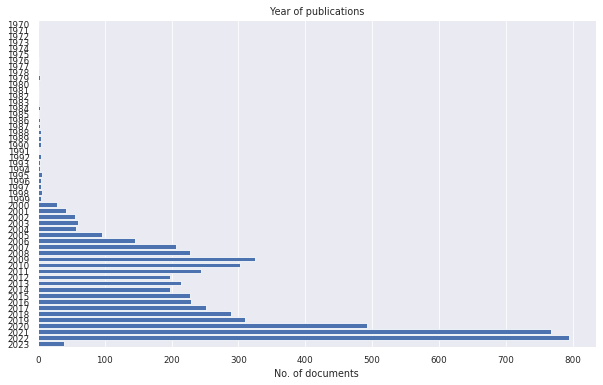

In [9]:

litstudy.plot_year_histogram(docs_csv);

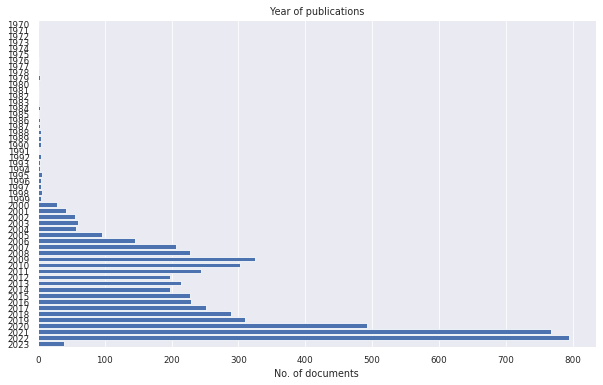

In [10]:
litstudy.plot_year_histogram(docs_csv);


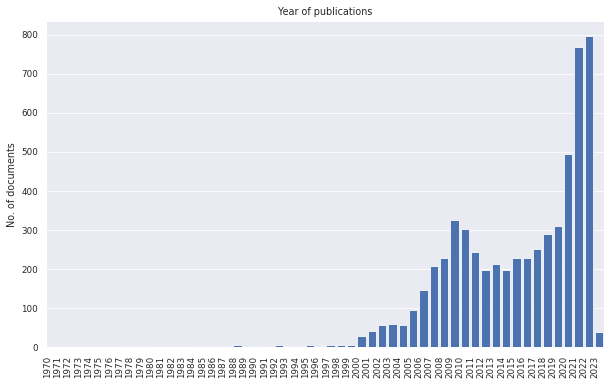

In [11]:
litstudy.plot_year_histogram(docs_csv, vertical=True);


In [12]:
#litstudy.plot_affiliation_histogram(docs_csv);


In [13]:
#litstudy.plot_author_histogram(docs_csv);


In [14]:
#litstudy.plot_number_authors_histogram(docs_csv);


In [15]:
#litstudy.plot_country_histogram(docs_csv, limit=15);

In [16]:
#litstudy.plot_continent_histogram(docs1);


In [17]:
litstudy.plot_cocitation_network(docs_csv, max_edges=500)

no edges given


In [18]:
corpus = litstudy.build_corpus(docs_csv, ngram_threshold=0.8)

In [19]:
litstudy.compute_word_distribution(corpus).filter(like='_', axis=0).sort_index()

,count
african_american,5
analytic_hierarchy,5
anatomical_landmarks,5
annual_meeting,11
ant_colony,7
...,...
upper_limb,23
vital_signs,112
wavelet_packet,53
western_reserve,10


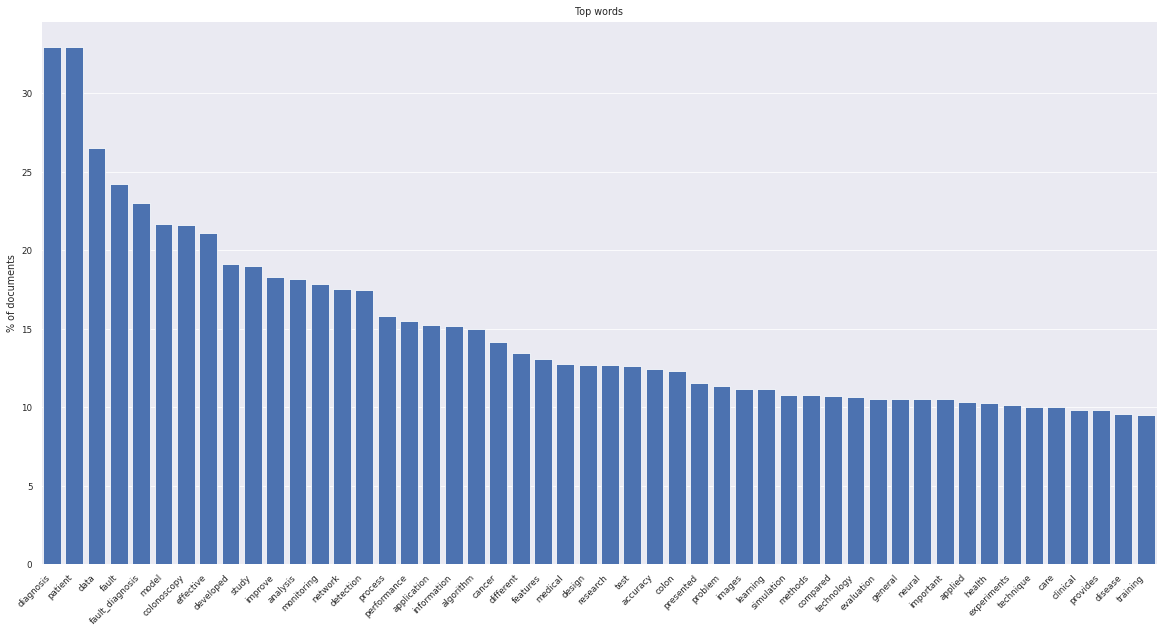

In [20]:
fig = plt.figure(figsize=(20, 10))
litstudy.plot_word_distribution(corpus, limit=50, title="Top words", vertical=True, label_rotation=45);
fig.savefig('wd.png', dpi=1000)

In [21]:
num_topics = 15
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=250)

In [22]:
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

Topic 1: ['trial', 'random', 'control', 'randomized_controlled', 'adenoma']
Topic 2: ['health', 'patient', 'healthcare', 'service', 'information']
Topic 3: ['clinical', 'decision', 'patient', 'virtual', 'data']
Topic 4: ['colon', 'images', 'segmentation', 'tissue', 'features']
Topic 5: ['artificial_intelligence', 'intelligent', 'artificial', 'medicine', 'application']
Topic 6: ['colonoscopy', 'bowel', 'preparation', 'bowel_preparation', 'quality']
Topic 7: ['patient', 'monitoring', 'hospital', 'vital', 'signs']
Topic 8: ['polyp', 'segmentation', 'detection', 'video', 'network']
Topic 9: ['cancer', 'colorectal', 'screening', 'colonoscopy', 'risk']
Topic 10: ['rehabilitation', 'patient', 'sensor', 'stroke', 'exercise']
Topic 11: ['fault', 'fault_diagnosis', 'diagnosis', 'network', 'neural']
Topic 12: ['endoscopy', 'capsule', 'capsule_endoscopy', 'learning', 'deep']
Topic 13: ['robot', 'surgery', 'surgical', 'endoscopic', 'design']
Topic 14: ['images', 'medical', 'miccai', 'intervention',

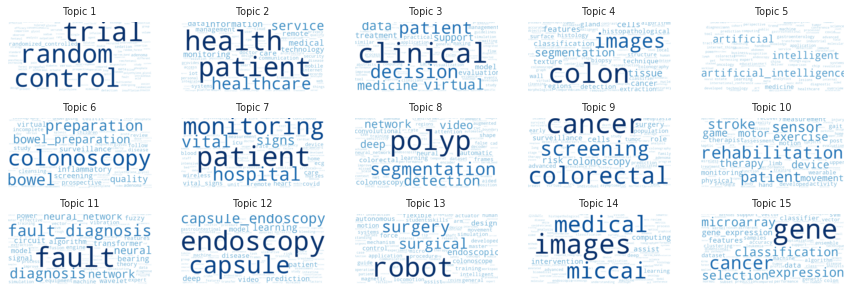

In [23]:
fig = plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5);
#svm = sn.heatmap(df_cm, annot=True,cmap='coolwarm', linecolor='white', linewidths=1)

#figure = svm.get_figure()    
fig.savefig('cloud.png', dpi=400)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


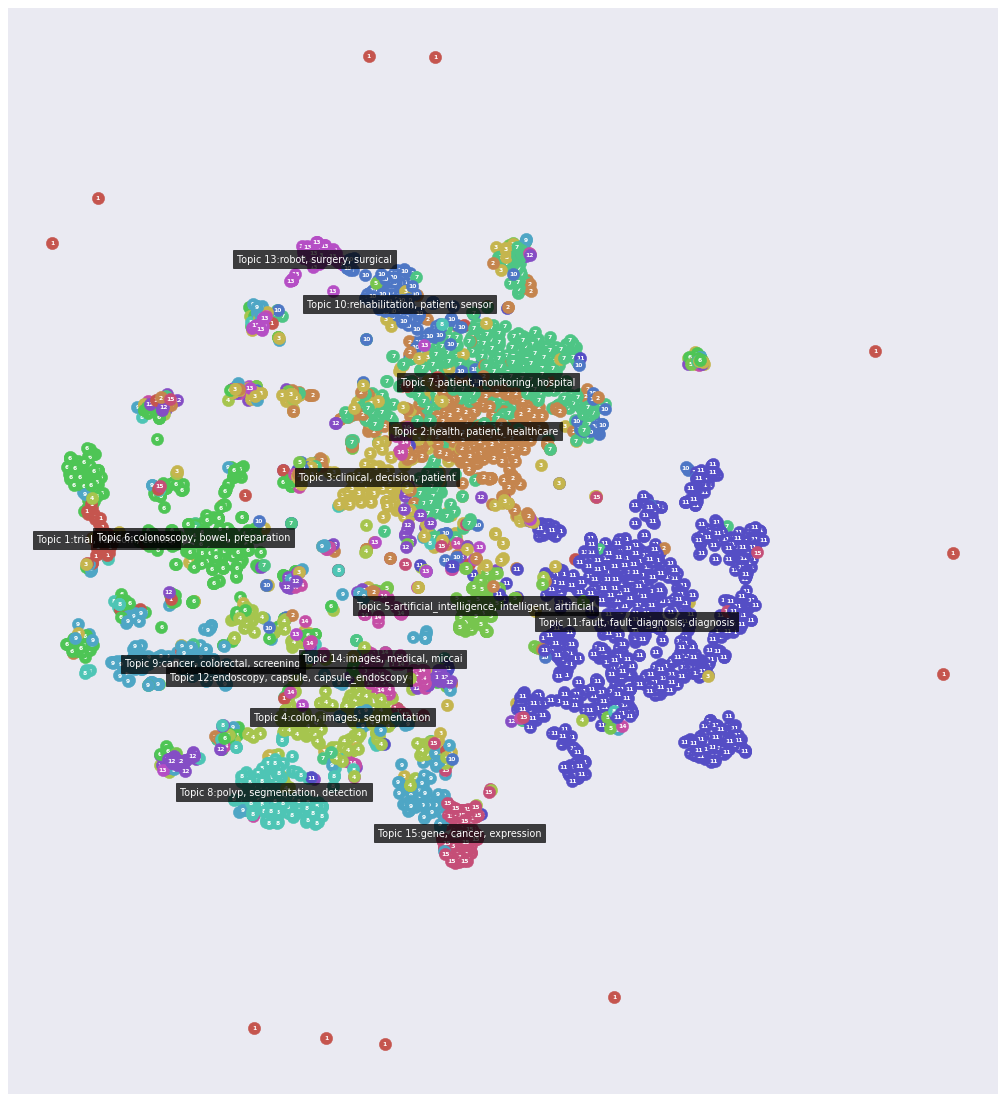

In [24]:
fig = plt.figure(figsize=(20, 20))
litstudy.plot_embedding(corpus, topic_model);
fig.savefig('gn.png', dpi=400)

In [25]:
topic_id = topic_model.best_topic_for_token('artificial_intelligence')

In [26]:
for doc_id in topic_model.best_documents_for_topic(topic_id, limit=10):
    print(docs_csv[int(doc_id)].title)

Artificial Intelligence
Artificial Intelligence in China
PRICAI 2022: Trends in Artificial Intelligence
The Triumph of Artificial Intelligence
Artificial Intelligence in Gastroenterology
Artificial Intelligence in Gastroenterology
Artificial intelligence in gastroenterology: where are we heading?
Handbook of Artificial Intelligence for Music
Artificial Intelligence in Industrial Applications
Artificial Intelligence and Technologies
